In [13]:
import numpy as np
import pandas as pd

import scipy.stats as st
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import statsmodels.api as sm
import pylab

In [14]:
def load_dataset(filename, df_1):
    df = pd.read_excel(filename)
    x = df[df_1]
    
    return x

### Constants

In [15]:
filename = 'distrib.xls'
x_name = 'La'

alpha = 0.05 # Significance level

### Data loading

In [16]:
x = load_dataset(filename, x_name)

print(x.head(10))

0    1.559936
1    1.106321
2    1.202140
3    1.192179
4    1.839849
5    0.542932
6    1.440528
7    3.196889
8    1.845235
9   -0.665195
Name: La, dtype: float64


### Statistics

In [17]:
statistics = x.describe(include='all')

print('count =', statistics['count'])
print('mean =', statistics['mean'])
print('standart_deviation =', statistics['std'])
print('min =', statistics['min'])
print('q_lower =', statistics['25%'])
print('median =', statistics['50%'])
print('q_upper =', statistics['75%'])
print('max =', statistics['max'])

count = 300.0
mean = 0.9974506821196134
standart_deviation = 1.3980093671183167
min = -6.758119860740125
q_lower = 0.4803256612584421
median = 1.0017132734134604
q_upper = 1.7197439196174562
max = 5.174600922284015


### Boxplot

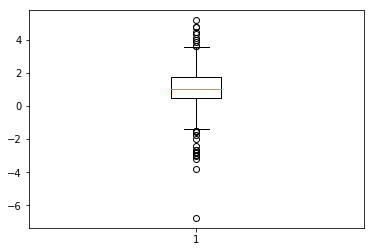

In [18]:
_ = plt.boxplot(x)

In [19]:
x = x.drop(x.idxmin())

### Confidence interval for expected value

In [20]:
alpha = 0.05

st.t.interval(1 - alpha, statistics['count'] - 1, statistics['mean'], st.sem(x)) 

(0.846532460559843, 1.1483689036793838)

### Histogramm and density plot

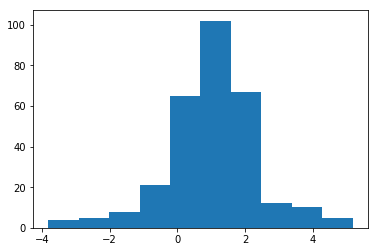

In [21]:
_ = plt.hist(x)

C:\Users\TEMP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\TEMP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


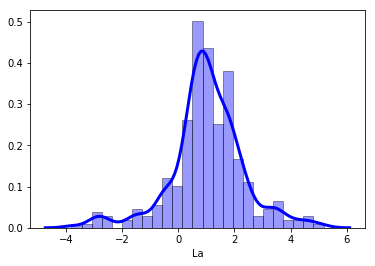

In [22]:
_ = sns.distplot(x, hist=True, kde=True,
                 color = 'blue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 3})

## Check if data is from normal distribution

### Q-Q plot

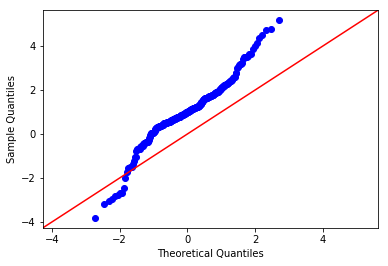

In [23]:
sm.qqplot(x, line='45')
pylab.show()

### Kolmogorov–Smirnov test

In [24]:
print('alpha =', alpha)
print()

statistics, pvalue = st.kstest(x, 'norm')

print('statistics =', statistics)
print('pvalue =', pvalue)

alpha = 0.05

statistics = 0.4403001903375387
pvalue = 0.0
